In [26]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

# Считываем данные

In [9]:
data = pd.read_table('log.txt', parse_dates=True, header=None)

In [10]:
data.columns = ['group', 'user_id', 'date', 'browser', 'clicks']

In [11]:
data.head()

,group,user_id,date,browser,clicks
0,slot=exp,userID=1,ts=2016-03-03,browser=Browser #2,all_cl=1
1,slot=exp,userID=1,ts=2016-03-03,browser=Browser #2,all_cl=5
2,slot=exp,userID=1,ts=2016-03-03,browser=Browser #2,all_cl=1
3,slot=exp,userID=1,ts=2016-03-03,browser=Browser #2,all_cl=1
4,slot=exp,userID=1,ts=2016-03-03,browser=Browser #2,all_cl=6


In [12]:
for index, row in tqdm(data.iterrows()):
    row['date'] = row['date'][3:]
    row['clicks'] = int(row['clicks'][7:])

6069253it [14:37, 6914.82it/s]


In [13]:
data.head()

,group,user_id,date,browser,clicks
0,slot=exp,userID=1,2016-03-03,browser=Browser #2,1
1,slot=exp,userID=1,2016-03-03,browser=Browser #2,5
2,slot=exp,userID=1,2016-03-03,browser=Browser #2,1
3,slot=exp,userID=1,2016-03-03,browser=Browser #2,1
4,slot=exp,userID=1,2016-03-03,browser=Browser #2,6


Так как у нас клики одного юзера зависимы, то усредним их. Для того, чтобы можно было спокойно использовать статистические тесты, предполагающие, что случайные величины независимы.

In [18]:
exp_sum_clicks = 0
control_sum_clicks = 0

In [19]:
exp_clicks_by_user = {}
control_clicks_by_user = {}

In [20]:
for index, row in tqdm(data.iterrows()):
    group = row['group']
    user_id = row['user_id']
    clicks = row['clicks']
    if group == 'slot=exp':
        if not user_id in exp_clicks_by_user.keys():
            exp_clicks_by_user[user_id] = (clicks, 1)
        else:
            clicks_sum, count = exp_clicks_by_user[user_id]
            exp_clicks_by_user[user_id] = (clicks_sum + clicks, count + 1)
        exp_sum_clicks += clicks
    else:
        if not user_id in control_clicks_by_user.keys():
            control_clicks_by_user[user_id] = (clicks, 1)
        else:
            clicks_sum, count = control_clicks_by_user[user_id]
            control_clicks_by_user[user_id] = (clicks_sum + clicks, count + 1)
        control_sum_clicks += clicks


0it [00:00, ?it/s]
1it [00:00,  7.62it/s]
743it [00:00, 3219.30it/s]
1438it [00:00, 4345.19it/s]
2158it [00:00, 5006.67it/s]
2816it [00:00, 5302.52it/s]
3407it [00:00, 5397.93it/s]
4137it [00:00, 5658.01it/s]
4738it [00:00, 5697.87it/s]
5481it [00:00, 5883.29it/s]
6211it [00:01, 6019.80it/s]
6923it [00:01, 6116.44it/s]
7650it [00:01, 6206.33it/s]
8346it [00:01, 6240.32it/s]
9032it [00:01, 6266.55it/s]
9711it [00:01, 6124.70it/s]
10327it [00:01, 6123.57it/s]
11056it [00:01, 6189.12it/s]
11824it [00:01, 6265.88it/s]
12509it [00:01, 6280.48it/s]
13250it [00:02, 6334.45it/s]
13945it [00:02, 6357.07it/s]
14638it [00:02, 6340.48it/s]
15303it [00:02, 6306.64it/s]
16035it [00:02, 6346.79it/s]
16777it [00:02, 6387.73it/s]
17526it [00:02, 6426.37it/s]
18256it [00:02, 6458.52it/s]
19021it [00:02, 6497.92it/s]
19750it [00:03, 6518.18it/s]
20497it [00:03, 6548.35it/s]
21240it [00:03, 6575.42it/s]
21985it [00:03, 6602.33it/s]
22722it [00:03, 6497.56it/s]
23371it [00:03, 6408.57it/s]
24034it [00:03,


107445it [00:16, 6570.82it/s]
108158it [00:16, 6574.04it/s]
108882it [00:16, 6578.10it/s]
109606it [00:16, 6581.45it/s]
110353it [00:16, 6587.41it/s]
111081it [00:16, 6591.54it/s]
111799it [00:16, 6592.85it/s]
112506it [00:17, 6593.43it/s]
113221it [00:17, 6596.59it/s]
113928it [00:17, 6599.18it/s]
114640it [00:17, 6602.21it/s]
115402it [00:17, 6608.08it/s]
116169it [00:17, 6613.82it/s]
116904it [00:17, 6616.89it/s]
117632it [00:17, 6620.18it/s]
118359it [00:17, 6618.83it/s]
119065it [00:17, 6621.31it/s]
119767it [00:18, 6623.09it/s]
120469it [00:18, 6625.26it/s]
121192it [00:18, 6628.57it/s]
121899it [00:18, 6629.61it/s]
122599it [00:18, 6626.95it/s]
123328it [00:18, 6630.32it/s]
124075it [00:18, 6634.79it/s]
124853it [00:18, 6640.93it/s]
125582it [00:18, 6643.55it/s]
126357it [00:19, 6649.35it/s]
127096it [00:19, 6653.10it/s]
127835it [00:19, 6656.30it/s]
128595it [00:19, 6661.00it/s]
129337it [00:19, 6661.00it/s]
130056it [00:19, 6652.66it/s]
130764it [00:19, 6654.85it/s]
131482it 

287705it [00:42, 6844.14it/s]
288441it [00:42, 6845.34it/s]
289180it [00:42, 6846.49it/s]
289902it [00:42, 6843.77it/s]
290584it [00:42, 6843.57it/s]
291263it [00:42, 6840.83it/s]
291992it [00:42, 6841.92it/s]
292667it [00:42, 6837.90it/s]
293379it [00:42, 6838.68it/s]
294039it [00:43, 6837.74it/s]
294695it [00:43, 6836.44it/s]
295343it [00:43, 6833.27it/s]
296030it [00:43, 6833.39it/s]
296772it [00:43, 6834.81it/s]
297526it [00:43, 6836.38it/s]
298233it [00:43, 6836.79it/s]
298973it [00:43, 6838.22it/s]
299734it [00:43, 6839.96it/s]
300490it [00:43, 6841.58it/s]
301267it [00:44, 6843.69it/s]
302060it [00:44, 6846.14it/s]
302821it [00:44, 6847.73it/s]
303580it [00:44, 6849.00it/s]
304334it [00:44, 6846.96it/s]
305045it [00:44, 6847.02it/s]
305749it [00:44, 6846.46it/s]
306440it [00:44, 6846.02it/s]
307217it [00:44, 6848.06it/s]
307929it [00:44, 6845.73it/s]
308643it [00:45, 6846.40it/s]
309332it [00:45, 6846.28it/s]
310019it [00:45, 6844.03it/s]
310771it [00:45, 6845.50it/s]
311538it [

467162it [01:07, 6887.89it/s]
467858it [01:07, 6887.99it/s]
468529it [01:08, 6886.89it/s]
469184it [01:08, 6885.40it/s]
469901it [01:08, 6885.80it/s]
470611it [01:08, 6886.13it/s]
471330it [01:08, 6886.56it/s]
472031it [01:08, 6886.75it/s]
472724it [01:08, 6886.65it/s]
473414it [01:08, 6885.35it/s]
474116it [01:08, 6885.57it/s]
474872it [01:08, 6886.51it/s]
475609it [01:09, 6887.23it/s]
476321it [01:09, 6886.93it/s]
477021it [01:09, 6885.48it/s]
477737it [01:09, 6885.81it/s]
478491it [01:09, 6886.80it/s]
479230it [01:09, 6887.51it/s]
479989it [01:09, 6888.45it/s]
480771it [01:09, 6889.84it/s]
481515it [01:09, 6890.48it/s]
482256it [01:10, 6889.29it/s]
482994it [01:10, 6889.90it/s]
483709it [01:10, 6890.07it/s]
484418it [01:10, 6889.62it/s]
485135it [01:10, 6890.01it/s]
485860it [01:10, 6890.50it/s]
486568it [01:10, 6889.58it/s]
487287it [01:10, 6889.99it/s]
487982it [01:10, 6887.50it/s]
488693it [01:10, 6887.81it/s]
489400it [01:11, 6888.00it/s]
490094it [01:11, 6888.13it/s]
490795it [

647469it [01:33, 6912.88it/s]
648235it [01:33, 6913.72it/s]
649003it [01:33, 6914.53it/s]
649761it [01:33, 6915.23it/s]
650512it [01:34, 6915.58it/s]
651255it [01:34, 6915.33it/s]
651976it [01:34, 6915.50it/s]
652736it [01:34, 6916.26it/s]
653518it [01:34, 6917.22it/s]
654275it [01:34, 6917.87it/s]
655025it [01:34, 6918.37it/s]
655822it [01:34, 6919.43it/s]
656584it [01:34, 6920.18it/s]
657345it [01:35, 6918.18it/s]
658044it [01:35, 6917.64it/s]
658726it [01:35, 6917.32it/s]
659408it [01:35, 6917.21it/s]
660167it [01:35, 6917.92it/s]
660926it [01:35, 6918.61it/s]
661690it [01:35, 6919.33it/s]
662441it [01:35, 6919.92it/s]
663179it [01:35, 6920.23it/s]
663945it [01:35, 6921.05it/s]
664697it [01:36, 6921.67it/s]
665443it [01:36, 6921.57it/s]
666185it [01:36, 6922.10it/s]
666917it [01:36, 6919.26it/s]
667643it [01:36, 6919.70it/s]
668400it [01:36, 6920.36it/s]
669144it [01:36, 6920.89it/s]
669920it [01:36, 6921.72it/s]
670715it [01:36, 6922.81it/s]
671515it [01:36, 6923.86it/s]
672319it [

833862it [01:59, 6993.26it/s]
834606it [01:59, 6993.62it/s]
835359it [01:59, 6994.06it/s]
836129it [01:59, 6994.65it/s]
836921it [01:59, 6995.40it/s]
837686it [01:59, 6993.32it/s]
838380it [01:59, 6992.50it/s]
839129it [01:59, 6992.92it/s]
839854it [02:00, 6993.13it/s]
840621it [02:00, 6993.68it/s]
841388it [02:00, 6994.25it/s]
842182it [02:00, 6995.00it/s]
842935it [02:00, 6995.30it/s]
843683it [02:00, 6994.82it/s]
844400it [02:00, 6994.88it/s]
845188it [02:00, 6995.60it/s]
845950it [02:00, 6996.13it/s]
846718it [02:01, 6996.68it/s]
847469it [02:01, 6995.88it/s]
848181it [02:01, 6994.43it/s]
848961it [02:01, 6995.09it/s]
849720it [02:01, 6995.54it/s]
850438it [02:01, 6995.64it/s]
851153it [02:01, 6995.65it/s]
851873it [02:01, 6995.79it/s]
852648it [02:01, 6996.37it/s]
853410it [02:01, 6996.94it/s]
854222it [02:02, 6997.86it/s]
855031it [02:02, 6998.71it/s]
855807it [02:02, 6999.28it/s]
856580it [02:02, 6999.60it/s]
857346it [02:02, 7000.13it/s]
858147it [02:02, 7000.94it/s]
858924it [

1019123it [02:24, 7042.93it/s]
1019870it [02:24, 7042.14it/s]
1020587it [02:24, 7042.25it/s]
1021297it [02:25, 7040.84it/s]
1022024it [02:25, 7040.98it/s]
1022721it [02:25, 7040.92it/s]
1023491it [02:25, 7041.39it/s]
1024257it [02:25, 7041.82it/s]
1025017it [02:25, 7042.21it/s]
1025772it [02:25, 7042.54it/s]
1026514it [02:25, 7042.61it/s]
1027292it [02:25, 7043.08it/s]
1028039it [02:25, 7043.03it/s]
1028799it [02:26, 7043.41it/s]
1029570it [02:26, 7043.87it/s]
1030319it [02:26, 7044.14it/s]
1031067it [02:26, 7044.06it/s]
1031801it [02:26, 7044.27it/s]
1032534it [02:26, 7044.28it/s]
1033259it [02:26, 7043.85it/s]
1033962it [02:26, 7043.82it/s]
1034719it [02:26, 7044.17it/s]
1035500it [02:26, 7044.66it/s]
1036240it [02:27, 7044.91it/s]
1037030it [02:27, 7045.47it/s]
1037783it [02:27, 7045.80it/s]
1038538it [02:27, 7046.14it/s]
1039293it [02:27, 7046.44it/s]
1040047it [02:27, 7046.27it/s]
1040779it [02:27, 7045.01it/s]
1041543it [02:27, 7045.40it/s]
1042283it [02:27, 7045.62it/s]
1042999i

1199266it [02:49, 7076.23it/s]
1199960it [02:49, 7075.49it/s]
1200630it [02:49, 7075.23it/s]
1201388it [02:49, 7075.56it/s]
1202163it [02:49, 7075.91it/s]
1202881it [02:50, 7074.44it/s]
1203615it [02:50, 7074.63it/s]
1204382it [02:50, 7074.98it/s]
1205161it [02:50, 7075.38it/s]
1205930it [02:50, 7075.75it/s]
1206702it [02:50, 7076.13it/s]
1207452it [02:50, 7076.24it/s]
1208198it [02:50, 7076.44it/s]
1208942it [02:50, 7076.07it/s]
1209685it [02:50, 7076.28it/s]
1210429it [02:51, 7076.48it/s]
1211164it [02:51, 7076.68it/s]
1211896it [02:51, 7076.46it/s]
1212626it [02:51, 7076.59it/s]
1213405it [02:51, 7077.02it/s]
1214143it [02:51, 7075.95it/s]
1214874it [02:51, 7076.07it/s]
1215637it [02:51, 7076.40it/s]
1216355it [02:51, 7075.95it/s]
1217052it [02:52, 7075.74it/s]
1217740it [02:52, 7074.77it/s]
1218483it [02:52, 7074.97it/s]
1219251it [02:52, 7075.33it/s]
1220030it [02:52, 7075.74it/s]
1220813it [02:52, 7076.15it/s]
1221576it [02:52, 7076.49it/s]
1222335it [02:52, 7076.75it/s]
1223088i

1372944it [03:14, 7054.35it/s]
1373623it [03:14, 7054.12it/s]
1374327it [03:14, 7054.11it/s]
1375056it [03:14, 7054.21it/s]
1375752it [03:15, 7053.64it/s]
1376455it [03:15, 7053.62it/s]
1377205it [03:15, 7053.85it/s]
1377933it [03:15, 7053.88it/s]
1378642it [03:15, 7053.89it/s]
1379346it [03:15, 7053.74it/s]
1380061it [03:15, 7053.80it/s]
1380763it [03:15, 7053.69it/s]
1381460it [03:15, 7053.54it/s]
1382164it [03:15, 7053.54it/s]
1382900it [03:16, 7053.68it/s]
1383608it [03:16, 7053.57it/s]
1384319it [03:16, 7053.58it/s]
1385022it [03:16, 7053.53it/s]
1385751it [03:16, 7053.65it/s]
1386460it [03:16, 7053.58it/s]
1387164it [03:16, 7053.45it/s]
1387861it [03:16, 7053.14it/s]
1388556it [03:16, 7053.08it/s]
1389243it [03:16, 7052.48it/s]
1389998it [03:17, 7052.75it/s]
1390687it [03:17, 7052.52it/s]
1391401it [03:17, 7052.56it/s]
1392093it [03:17, 7051.69it/s]
1392827it [03:17, 7051.84it/s]
1393505it [03:17, 7050.65it/s]
1394136it [03:17, 7049.98it/s]
1394753it [03:17, 7048.94it/s]
1395378i

1544148it [03:39, 7027.09it/s]
1544841it [03:39, 7026.82it/s]
1545587it [03:39, 7027.01it/s]
1546353it [03:40, 7027.27it/s]
1547118it [03:40, 7027.58it/s]
1547851it [03:40, 7027.62it/s]
1548584it [03:40, 7027.77it/s]
1549313it [03:40, 7027.62it/s]
1550025it [03:40, 7027.52it/s]
1550728it [03:40, 7026.62it/s]
1551411it [03:40, 7026.54it/s]
1552167it [03:40, 7026.78it/s]
1552948it [03:40, 7027.13it/s]
1553667it [03:41, 7027.04it/s]
1554376it [03:41, 7026.79it/s]
1555071it [03:41, 7026.76it/s]
1555851it [03:41, 7027.12it/s]
1556574it [03:41, 7027.20it/s]
1557294it [03:41, 7026.64it/s]
1558009it [03:41, 7026.70it/s]
1558703it [03:41, 7026.60it/s]
1559485it [03:41, 7026.94it/s]
1560207it [03:42, 7027.03it/s]
1560967it [03:42, 7027.30it/s]
1561744it [03:42, 7027.61it/s]
1562489it [03:42, 7027.75it/s]
1563262it [03:42, 7028.06it/s]
1564018it [03:42, 7028.29it/s]
1564783it [03:42, 7028.57it/s]
1565551it [03:42, 7028.86it/s]
1566311it [03:42, 7029.03it/s]
1567066it [03:42, 7029.13it/s]
1567812i

1720039it [04:04, 7029.44it/s]
1720809it [04:04, 7029.69it/s]
1721568it [04:04, 7028.86it/s]
1722265it [04:05, 7028.81it/s]
1723033it [04:05, 7029.06it/s]
1723825it [04:05, 7029.44it/s]
1724617it [04:05, 7029.80it/s]
1725372it [04:05, 7029.66it/s]
1726103it [04:05, 7029.25it/s]
1726854it [04:05, 7029.46it/s]
1727591it [04:05, 7029.58it/s]
1728392it [04:05, 7030.00it/s]
1729183it [04:05, 7030.35it/s]
1729985it [04:06, 7030.76it/s]
1730773it [04:06, 7031.10it/s]
1731555it [04:06, 7031.42it/s]
1732365it [04:06, 7031.85it/s]
1733159it [04:06, 7032.22it/s]
1733949it [04:06, 7032.56it/s]
1734738it [04:06, 7032.25it/s]
1735484it [04:06, 7031.61it/s]
1736253it [04:06, 7031.87it/s]
1737047it [04:07, 7032.24it/s]
1737788it [04:07, 7031.94it/s]
1738550it [04:07, 7032.21it/s]
1739314it [04:07, 7032.45it/s]
1740086it [04:07, 7032.73it/s]
1740834it [04:07, 7032.81it/s]
1741606it [04:07, 7033.11it/s]
1742400it [04:07, 7033.48it/s]
1743194it [04:07, 7033.82it/s]
1743967it [04:07, 7033.65it/s]
1744707i

1898614it [04:29, 7036.36it/s]
1899324it [04:29, 7036.32it/s]
1900086it [04:30, 7036.53it/s]
1900859it [04:30, 7036.79it/s]
1901616it [04:30, 7036.98it/s]
1902359it [04:30, 7036.98it/s]
1903091it [04:30, 7035.98it/s]
1903783it [04:30, 7035.93it/s]
1904512it [04:30, 7036.02it/s]
1905202it [04:30, 7035.83it/s]
1905906it [04:30, 7035.79it/s]
1906651it [04:30, 7035.96it/s]
1907440it [04:31, 7036.29it/s]
1908192it [04:31, 7036.45it/s]
1908928it [04:31, 7036.58it/s]
1909699it [04:31, 7036.82it/s]
1910445it [04:31, 7036.78it/s]
1911177it [04:31, 7036.37it/s]
1911876it [04:31, 7035.91it/s]
1912540it [04:31, 7035.54it/s]
1913273it [04:31, 7035.65it/s]
1914012it [04:32, 7035.78it/s]
1914716it [04:32, 7035.76it/s]
1915439it [04:32, 7035.84it/s]
1916144it [04:32, 7035.60it/s]
1916830it [04:32, 7035.30it/s]
1917536it [04:32, 7035.31it/s]
1918231it [04:32, 7035.27it/s]
1918915it [04:32, 7034.66it/s]
1919564it [04:32, 7034.39it/s]
1920271it [04:32, 7034.40it/s]
1921011it [04:33, 7034.54it/s]
1921697i

2073014it [04:54, 7027.39it/s]
2073811it [04:55, 7027.70it/s]
2074598it [04:55, 7027.98it/s]
2075372it [04:55, 7028.23it/s]
2076138it [04:55, 7028.44it/s]
2076899it [04:55, 7028.55it/s]
2077682it [04:55, 7028.81it/s]
2078492it [04:55, 7029.17it/s]
2079293it [04:55, 7029.51it/s]
2080077it [04:55, 7029.68it/s]
2080853it [04:56, 7028.90it/s]
2081614it [04:56, 7029.10it/s]
2082336it [04:56, 7029.09it/s]
2083104it [04:56, 7029.31it/s]
2083854it [04:56, 7029.45it/s]
2084591it [04:56, 7029.58it/s]
2085411it [04:56, 7029.97it/s]
2086210it [04:56, 7030.29it/s]
2086995it [04:56, 7030.57it/s]
2087786it [04:56, 7030.86it/s]
2088567it [04:57, 7031.11it/s]
2089347it [04:57, 7031.32it/s]
2090141it [04:57, 7031.63it/s]
2090951it [04:57, 7031.99it/s]
2091741it [04:57, 7032.16it/s]
2092520it [04:57, 7032.30it/s]
2093288it [04:57, 7032.43it/s]
2094048it [04:57, 7032.11it/s]
2094786it [04:57, 7032.21it/s]
2095510it [04:57, 7032.08it/s]
2096218it [04:58, 7031.77it/s]
2096992it [04:58, 7032.01it/s]
2097747i

2259883it [05:19, 7066.37it/s]
2260649it [05:19, 7066.57it/s]
2261438it [05:20, 7066.83it/s]
2262199it [05:20, 7066.95it/s]
2262956it [05:20, 7066.99it/s]
2263737it [05:20, 7067.21it/s]
2264534it [05:20, 7067.50it/s]
2265302it [05:20, 7067.52it/s]
2266111it [05:20, 7067.82it/s]
2266900it [05:20, 7068.07it/s]
2267690it [05:20, 7068.35it/s]
2268469it [05:20, 7068.49it/s]
2269240it [05:21, 7068.61it/s]
2270018it [05:21, 7068.83it/s]
2270786it [05:21, 7068.96it/s]
2271548it [05:21, 7069.09it/s]
2272335it [05:21, 7069.34it/s]
2273101it [05:21, 7069.41it/s]
2273913it [05:21, 7069.74it/s]
2274688it [05:21, 7069.92it/s]
2275474it [05:21, 7070.19it/s]
2276264it [05:21, 7070.45it/s]
2277062it [05:22, 7070.73it/s]
2277848it [05:22, 7070.93it/s]
2278636it [05:22, 7071.17it/s]
2279420it [05:22, 7071.41it/s]
2280203it [05:22, 7071.64it/s]
2280999it [05:22, 7071.90it/s]
2281808it [05:22, 7072.23it/s]
2282650it [05:22, 7072.64it/s]
2283457it [05:22, 7072.39it/s]
2284216it [05:22, 7072.49it/s]
2285029i

2447479it [05:44, 7102.81it/s]
2448258it [05:44, 7102.66it/s]
2449003it [05:44, 7102.54it/s]
2449787it [05:44, 7102.77it/s]
2450595it [05:45, 7103.05it/s]
2451402it [05:45, 7103.32it/s]
2452207it [05:45, 7103.60it/s]
2453026it [05:45, 7103.91it/s]
2453821it [05:45, 7104.14it/s]
2454630it [05:45, 7104.44it/s]
2455442it [05:45, 7104.73it/s]
2456257it [05:45, 7105.03it/s]
2457074it [05:45, 7105.34it/s]
2457891it [05:45, 7105.64it/s]
2458714it [05:46, 7105.97it/s]
2459529it [05:46, 7106.17it/s]
2460333it [05:46, 7106.07it/s]
2461101it [05:46, 7106.15it/s]
2461933it [05:46, 7106.50it/s]
2462772it [05:46, 7106.86it/s]
2463570it [05:46, 7107.11it/s]
2464368it [05:46, 7107.33it/s]
2465168it [05:46, 7107.60it/s]
2466015it [05:46, 7108.00it/s]
2466867it [05:47, 7108.40it/s]
2467716it [05:47, 7108.78it/s]
2468554it [05:47, 7109.16it/s]
2469393it [05:47, 7109.53it/s]
2470228it [05:47, 7109.84it/s]
2471057it [05:47, 7110.15it/s]
2471883it [05:47, 7110.48it/s]
2472709it [05:47, 7110.69it/s]
2473544i

2636589it [06:09, 7139.83it/s]
2637386it [06:09, 7139.70it/s]
2638146it [06:09, 7139.66it/s]
2638891it [06:09, 7139.50it/s]
2639610it [06:09, 7139.34it/s]
2640387it [06:09, 7139.52it/s]
2641175it [06:09, 7139.72it/s]
2641973it [06:10, 7139.95it/s]
2642748it [06:10, 7140.09it/s]
2643512it [06:10, 7140.14it/s]
2644302it [06:10, 7140.37it/s]
2645089it [06:10, 7140.56it/s]
2645861it [06:10, 7140.29it/s]
2646591it [06:10, 7140.17it/s]
2647341it [06:10, 7140.26it/s]
2648066it [06:10, 7140.10it/s]
2648869it [06:10, 7140.34it/s]
2649652it [06:11, 7140.51it/s]
2650431it [06:11, 7140.69it/s]
2651224it [06:11, 7140.91it/s]
2652027it [06:11, 7141.14it/s]
2652839it [06:11, 7141.41it/s]
2653639it [06:11, 7141.61it/s]
2654431it [06:11, 7141.68it/s]
2655251it [06:11, 7141.96it/s]
2656053it [06:11, 7142.19it/s]
2656860it [06:11, 7142.44it/s]
2657656it [06:12, 7142.59it/s]
2658446it [06:12, 7142.06it/s]
2659248it [06:12, 7142.30it/s]
2660062it [06:12, 7142.56it/s]
2660839it [06:12, 7142.72it/s]
2661629i

2824454it [06:34, 7163.48it/s]
2825239it [06:34, 7163.64it/s]
2825929it [06:34, 7163.24it/s]
2826586it [06:34, 7163.06it/s]
2827358it [06:34, 7163.20it/s]
2828122it [06:34, 7163.32it/s]
2828921it [06:34, 7163.55it/s]
2829660it [06:35, 7163.58it/s]
2830415it [06:35, 7163.66it/s]
2831157it [06:35, 7163.71it/s]
2831943it [06:35, 7163.89it/s]
2832722it [06:35, 7164.04it/s]
2833484it [06:35, 7164.16it/s]
2834283it [06:35, 7164.36it/s]
2835093it [06:35, 7164.58it/s]
2835896it [06:35, 7164.81it/s]
2836706it [06:35, 7165.03it/s]
2837539it [06:36, 7165.34it/s]
2838370it [06:36, 7165.61it/s]
2839183it [06:36, 7165.77it/s]
2839985it [06:36, 7165.86it/s]
2840772it [06:36, 7165.99it/s]
2841579it [06:36, 7166.21it/s]
2842366it [06:36, 7166.38it/s]
2843189it [06:36, 7166.65it/s]
2843996it [06:36, 7166.86it/s]
2844795it [06:36, 7167.02it/s]
2845606it [06:37, 7167.25it/s]
2846404it [06:37, 7167.40it/s]
2847196it [06:37, 7167.51it/s]
2847976it [06:37, 7167.34it/s]
2848751it [06:37, 7167.50it/s]
2849557i

3011739it [06:59, 7186.33it/s]
3012518it [06:59, 7186.47it/s]
3013268it [06:59, 7186.38it/s]
3014027it [06:59, 7186.49it/s]
3014860it [06:59, 7186.75it/s]
3015628it [06:59, 7186.83it/s]
3016390it [06:59, 7186.72it/s]
3017175it [06:59, 7186.89it/s]
3017970it [06:59, 7187.07it/s]
3018763it [07:00, 7187.22it/s]
3019546it [07:00, 7187.38it/s]
3020337it [07:00, 7187.55it/s]
3021123it [07:00, 7187.71it/s]
3021908it [07:00, 7187.86it/s]
3022690it [07:00, 7187.93it/s]
3023526it [07:00, 7188.21it/s]
3024348it [07:00, 7188.46it/s]
3025148it [07:00, 7188.60it/s]
3025995it [07:00, 7188.91it/s]
3026805it [07:01, 7189.07it/s]
3027621it [07:01, 7189.30it/s]
3028427it [07:01, 7189.50it/s]
3029268it [07:01, 7189.78it/s]
3030085it [07:01, 7190.00it/s]
3030903it [07:01, 7190.24it/s]
3031718it [07:01, 7190.43it/s]
3032529it [07:01, 7190.64it/s]
3033338it [07:01, 7190.81it/s]
3034142it [07:01, 7190.55it/s]
3034924it [07:02, 7190.70it/s]
3035730it [07:02, 7190.91it/s]
3036536it [07:02, 7191.10it/s]
3037320i

3200447it [07:23, 7208.34it/s]
3201194it [07:24, 7208.35it/s]
3201994it [07:24, 7208.54it/s]
3202828it [07:24, 7208.78it/s]
3203622it [07:24, 7208.96it/s]
3204408it [07:24, 7208.95it/s]
3205176it [07:24, 7208.92it/s]
3206009it [07:24, 7209.17it/s]
3206834it [07:24, 7209.40it/s]
3207627it [07:24, 7209.56it/s]
3208435it [07:25, 7209.76it/s]
3209251it [07:25, 7209.97it/s]
3210053it [07:25, 7210.03it/s]
3210860it [07:25, 7210.22it/s]
3211652it [07:25, 7210.35it/s]
3212439it [07:25, 7210.36it/s]
3213208it [07:25, 7210.29it/s]
3213972it [07:25, 7210.39it/s]
3214724it [07:25, 7210.41it/s]
3215470it [07:25, 7210.39it/s]
3216248it [07:26, 7210.50it/s]
3217000it [07:26, 7210.58it/s]
3217758it [07:26, 7210.65it/s]
3218540it [07:26, 7210.80it/s]
3219325it [07:26, 7210.94it/s]
3220117it [07:26, 7211.09it/s]
3220904it [07:26, 7211.22it/s]
3221683it [07:26, 7211.31it/s]
3222456it [07:26, 7211.42it/s]
3223261it [07:26, 7211.61it/s]
3224087it [07:27, 7211.82it/s]
3224897it [07:27, 7212.02it/s]
3225696i

3389302it [07:48, 7230.06it/s]
3390095it [07:48, 7230.21it/s]
3390893it [07:48, 7230.36it/s]
3391706it [07:49, 7230.56it/s]
3392508it [07:49, 7230.73it/s]
3393303it [07:49, 7230.87it/s]
3394097it [07:49, 7230.99it/s]
3394940it [07:49, 7231.24it/s]
3395746it [07:49, 7231.40it/s]
3396547it [07:49, 7231.51it/s]
3397343it [07:49, 7231.61it/s]
3398130it [07:49, 7231.64it/s]
3398900it [07:50, 7231.36it/s]
3399626it [07:50, 7231.22it/s]
3400429it [07:50, 7231.40it/s]
3401232it [07:50, 7231.55it/s]
3402016it [07:50, 7231.70it/s]
3402813it [07:50, 7231.85it/s]
3403636it [07:50, 7232.06it/s]
3404425it [07:50, 7231.92it/s]
3405178it [07:50, 7231.88it/s]
3406000it [07:50, 7232.07it/s]
3406819it [07:51, 7232.29it/s]
3407613it [07:51, 7232.44it/s]
3408415it [07:51, 7232.60it/s]
3409229it [07:51, 7232.79it/s]
3410026it [07:51, 7232.85it/s]
3410845it [07:51, 7233.05it/s]
3411639it [07:51, 7233.19it/s]
3412431it [07:51, 7233.25it/s]
3413214it [07:51, 7233.37it/s]
3413994it [07:51, 7233.29it/s]
3414747i

3545639it [08:14, 7174.63it/s]
3546068it [08:14, 7173.87it/s]
3546551it [08:14, 7173.39it/s]
3547003it [08:14, 7172.85it/s]
3547468it [08:14, 7172.29it/s]
3548008it [08:14, 7171.98it/s]
3548594it [08:14, 7171.71it/s]
3549103it [08:14, 7170.93it/s]
3549581it [08:15, 7170.26it/s]
3550043it [08:15, 7169.35it/s]
3550476it [08:15, 7168.52it/s]
3550890it [08:15, 7167.87it/s]
3551300it [08:15, 7167.05it/s]
3551695it [08:15, 7166.31it/s]
3552111it [08:15, 7165.67it/s]
3552508it [08:15, 7165.00it/s]
3552960it [08:15, 7164.46it/s]
3553423it [08:16, 7163.92it/s]
3553892it [08:16, 7163.43it/s]
3554330it [08:16, 7162.77it/s]
3554767it [08:16, 7162.23it/s]
3555200it [08:16, 7161.63it/s]
3555656it [08:16, 7161.10it/s]
3556094it [08:16, 7160.49it/s]
3556538it [08:16, 7159.93it/s]
3556976it [08:16, 7159.39it/s]
3557413it [08:16, 7158.81it/s]
3557873it [08:17, 7158.25it/s]
3558323it [08:17, 7157.75it/s]
3558768it [08:17, 7156.95it/s]
3559192it [08:17, 7156.21it/s]
3559605it [08:17, 7155.53it/s]
3560012i

3685132it [08:39, 7088.75it/s]
3685711it [08:39, 7088.49it/s]
3686270it [08:40, 7088.00it/s]
3686818it [08:40, 7087.69it/s]
3687492it [08:40, 7087.62it/s]
3688216it [08:40, 7087.64it/s]
3688840it [08:40, 7087.02it/s]
3689483it [08:40, 7086.90it/s]
3690079it [08:40, 7086.57it/s]
3690763it [08:40, 7086.51it/s]
3691501it [08:40, 7086.57it/s]
3692194it [08:41, 7086.54it/s]
3692975it [08:41, 7086.68it/s]
3693761it [08:41, 7086.81it/s]
3694544it [08:41, 7086.96it/s]
3695336it [08:41, 7087.13it/s]
3696093it [08:41, 7086.98it/s]
3696843it [08:41, 7087.06it/s]
3697575it [08:41, 7087.05it/s]
3698298it [08:41, 7087.04it/s]
3699017it [08:41, 7086.60it/s]
3699681it [08:42, 7086.46it/s]
3700392it [08:42, 7086.46it/s]
3701114it [08:42, 7086.48it/s]
3701801it [08:42, 7086.19it/s]
3702456it [08:42, 7085.64it/s]
3703063it [08:42, 7085.38it/s]
3703727it [08:42, 7085.30it/s]
3704486it [08:42, 7085.39it/s]
3705207it [08:42, 7085.41it/s]
3705915it [08:43, 7085.41it/s]
3706675it [08:43, 7085.51it/s]
3707384i

3854582it [09:05, 7071.15it/s]
3855337it [09:05, 7070.94it/s]
3856051it [09:05, 7070.25it/s]
3856690it [09:05, 7069.74it/s]
3857356it [09:05, 7069.67it/s]
3858134it [09:05, 7069.78it/s]
3858872it [09:05, 7069.85it/s]
3859652it [09:05, 7069.98it/s]
3860375it [09:06, 7070.01it/s]
3861092it [09:06, 7069.30it/s]
3861732it [09:06, 7068.90it/s]
3862449it [09:06, 7068.91it/s]
3863087it [09:06, 7068.63it/s]
3863705it [09:06, 7068.02it/s]
3864276it [09:06, 7067.48it/s]
3864815it [09:06, 7066.99it/s]
3865338it [09:07, 7066.37it/s]
3865982it [09:07, 7066.26it/s]
3866671it [09:07, 7066.23it/s]
3867419it [09:07, 7066.30it/s]
3868176it [09:07, 7066.39it/s]
3868912it [09:07, 7066.44it/s]
3869668it [09:07, 7066.53it/s]
3870409it [09:07, 7066.60it/s]
3871172it [09:07, 7066.70it/s]
3871904it [09:07, 7066.72it/s]
3872633it [09:08, 7066.76it/s]
3873412it [09:08, 7066.89it/s]
3874155it [09:08, 7066.88it/s]
3874887it [09:08, 7066.76it/s]
3875593it [09:08, 7066.72it/s]
3876320it [09:08, 7066.76it/s]
3877100i

3984573it [09:30, 6978.79it/s]
3984967it [09:31, 6977.94it/s]
3985447it [09:31, 6977.56it/s]
3985870it [09:31, 6977.05it/s]
3986299it [09:31, 6976.57it/s]
3986714it [09:31, 6976.05it/s]
3987127it [09:31, 6975.55it/s]
3987568it [09:31, 6975.09it/s]
3988079it [09:31, 6974.75it/s]
3988527it [09:31, 6974.30it/s]
3988993it [09:31, 6973.89it/s]
3989444it [09:32, 6973.37it/s]
3989885it [09:32, 6972.86it/s]
3990380it [09:32, 6972.50it/s]
3990852it [09:32, 6972.09it/s]
3991310it [09:32, 6971.30it/s]
3991735it [09:32, 6970.70it/s]
3992148it [09:32, 6970.19it/s]
3992573it [09:32, 6969.71it/s]
3992989it [09:32, 6969.20it/s]
3993531it [09:33, 6968.92it/s]
3994062it [09:33, 6968.63it/s]
3994598it [09:33, 6968.34it/s]
3995092it [09:33, 6967.77it/s]
3995563it [09:33, 6967.30it/s]
3996025it [09:33, 6966.67it/s]
3996467it [09:33, 6966.11it/s]
3996897it [09:33, 6965.55it/s]
3997317it [09:33, 6965.03it/s]
3997744it [09:34, 6964.57it/s]
3998186it [09:34, 6964.10it/s]
3998673it [09:34, 6963.73it/s]
3999137i

4135315it [09:56, 6935.51it/s]
4135999it [09:56, 6935.49it/s]
4136724it [09:56, 6935.54it/s]
4137400it [09:56, 6935.16it/s]
4138030it [09:56, 6934.94it/s]
4138774it [09:56, 6935.02it/s]
4139495it [09:56, 6935.07it/s]
4140167it [09:57, 6934.92it/s]
4140821it [09:57, 6934.84it/s]
4141473it [09:57, 6934.54it/s]
4142132it [09:57, 6934.49it/s]
4142822it [09:57, 6934.48it/s]
4143522it [09:57, 6934.49it/s]
4144187it [09:57, 6933.93it/s]
4144985it [09:57, 6934.11it/s]
4145784it [09:57, 6934.29it/s]
4146575it [09:57, 6934.45it/s]
4147314it [09:58, 6934.52it/s]
4148046it [09:58, 6934.45it/s]
4148754it [09:58, 6934.35it/s]
4149531it [09:58, 6934.49it/s]
4150280it [09:58, 6934.58it/s]
4151006it [09:58, 6934.46it/s]
4151703it [09:58, 6933.99it/s]
4152339it [09:58, 6933.36it/s]
4152915it [09:58, 6933.13it/s]
4153547it [09:59, 6933.03it/s]
4154196it [09:59, 6932.96it/s]
4154835it [09:59, 6932.85it/s]
4155452it [09:59, 6932.55it/s]
4156202it [09:59, 6932.64it/s]
4156903it [09:59, 6932.65it/s]
4157560i

4314233it [10:21, 6944.43it/s]
4314987it [10:21, 6944.48it/s]
4315733it [10:21, 6944.55it/s]
4316507it [10:21, 6944.69it/s]
4317261it [10:21, 6944.52it/s]
4317972it [10:21, 6944.47it/s]
4318705it [10:21, 6944.52it/s]
4319412it [10:21, 6944.41it/s]
4320116it [10:22, 6944.42it/s]
4320806it [10:22, 6944.36it/s]
4321508it [10:22, 6944.37it/s]
4322194it [10:22, 6944.21it/s]
4322917it [10:22, 6944.26it/s]
4323604it [10:22, 6944.24it/s]
4324300it [10:22, 6944.24it/s]
4324989it [10:22, 6944.24it/s]
4325678it [10:22, 6944.23it/s]
4326386it [10:23, 6944.25it/s]
4327080it [10:23, 6944.19it/s]
4327764it [10:23, 6943.99it/s]
4328524it [10:23, 6944.10it/s]
4329312it [10:23, 6944.24it/s]
4330095it [10:23, 6944.39it/s]
4330837it [10:23, 6944.46it/s]
4331622it [10:23, 6944.60it/s]
4332374it [10:23, 6944.60it/s]
4333109it [10:23, 6944.39it/s]
4333800it [10:24, 6944.34it/s]
4334484it [10:24, 6944.24it/s]
4335154it [10:24, 6944.19it/s]
4335849it [10:24, 6944.19it/s]
4336574it [10:24, 6944.24it/s]
4337264i

4478204it [10:46, 6923.82it/s]
4478700it [10:46, 6923.32it/s]
4479180it [10:46, 6923.04it/s]
4479671it [10:47, 6922.73it/s]
4480152it [10:47, 6922.38it/s]
4480631it [10:47, 6922.03it/s]
4481108it [10:47, 6921.63it/s]
4481721it [10:47, 6921.50it/s]
4482363it [10:47, 6921.43it/s]
4482913it [10:47, 6921.16it/s]
4483456it [10:47, 6920.91it/s]
4483997it [10:47, 6920.30it/s]
4484496it [10:48, 6919.80it/s]
4485076it [10:48, 6919.63it/s]
4485688it [10:48, 6919.50it/s]
4486243it [10:48, 6919.29it/s]
4486891it [10:48, 6919.22it/s]
4487470it [10:48, 6919.03it/s]
4488084it [10:48, 6918.91it/s]
4488671it [10:48, 6918.43it/s]
4489216it [10:48, 6918.05it/s]
4489740it [10:49, 6917.66it/s]
4490256it [10:49, 6917.39it/s]
4490938it [10:49, 6917.37it/s]
4491549it [10:49, 6917.25it/s]
4492182it [10:49, 6917.16it/s]
4492807it [10:49, 6917.05it/s]
4493489it [10:49, 6917.04it/s]
4494115it [10:49, 6916.77it/s]
4494716it [10:49, 6916.24it/s]
4495269it [10:49, 6915.92it/s]
4495807it [10:50, 6915.56it/s]
4496515i

4645831it [11:12, 6912.79it/s]
4646507it [11:12, 6912.74it/s]
4647176it [11:12, 6912.69it/s]
4647918it [11:12, 6912.77it/s]
4648726it [11:12, 6912.94it/s]
4649531it [11:12, 6913.11it/s]
4650328it [11:12, 6913.27it/s]
4651092it [11:12, 6913.26it/s]
4651833it [11:12, 6913.07it/s]
4652528it [11:13, 6912.83it/s]
4653226it [11:13, 6912.84it/s]
4653917it [11:13, 6912.82it/s]
4654592it [11:13, 6912.80it/s]
4655422it [11:13, 6913.00it/s]
4656197it [11:13, 6913.12it/s]
4656933it [11:13, 6913.11it/s]
4657652it [11:13, 6913.10it/s]
4658363it [11:13, 6913.11it/s]
4659126it [11:13, 6913.22it/s]
4659910it [11:14, 6913.35it/s]
4660652it [11:14, 6913.17it/s]
4661436it [11:14, 6913.31it/s]
4662240it [11:14, 6913.48it/s]
4662987it [11:14, 6913.48it/s]
4663739it [11:14, 6913.57it/s]
4664476it [11:14, 6913.61it/s]
4665265it [11:14, 6913.76it/s]
4666084it [11:14, 6913.95it/s]
4666854it [11:14, 6914.00it/s]
4667612it [11:15, 6914.10it/s]
4668370it [11:15, 6914.17it/s]
4669122it [11:15, 6914.02it/s]
4669853i

4816521it [11:37, 6905.88it/s]
4817121it [11:37, 6905.51it/s]
4817750it [11:37, 6905.42it/s]
4818333it [11:37, 6905.22it/s]
4818914it [11:37, 6905.03it/s]
4819500it [11:37, 6904.87it/s]
4820075it [11:38, 6904.66it/s]
4820835it [11:38, 6904.76it/s]
4821621it [11:38, 6904.90it/s]
4822396it [11:38, 6905.02it/s]
4823100it [11:38, 6905.03it/s]
4823846it [11:38, 6905.11it/s]
4824600it [11:38, 6905.20it/s]
4825363it [11:38, 6905.30it/s]
4826112it [11:38, 6905.38it/s]
4826853it [11:39, 6905.03it/s]
4827616it [11:39, 6905.13it/s]
4828354it [11:39, 6905.19it/s]
4829098it [11:39, 6905.27it/s]
4829853it [11:39, 6905.36it/s]
4830634it [11:39, 6905.49it/s]
4831410it [11:39, 6905.61it/s]
4832165it [11:39, 6905.68it/s]
4832914it [11:39, 6905.71it/s]
4833653it [11:39, 6905.78it/s]
4834391it [11:40, 6905.82it/s]
4835124it [11:40, 6905.88it/s]
4835898it [11:40, 6906.00it/s]
4836643it [11:40, 6906.03it/s]
4837394it [11:40, 6906.11it/s]
4838134it [11:40, 6906.14it/s]
4838865it [11:40, 6906.15it/s]
4839649i

4981794it [12:02, 6891.98it/s]
4982498it [12:02, 6892.00it/s]
4983216it [12:03, 6892.04it/s]
4983917it [12:03, 6892.06it/s]
4984611it [12:03, 6892.00it/s]
4985338it [12:03, 6892.05it/s]
4986128it [12:03, 6892.19it/s]
4986957it [12:03, 6892.38it/s]
4987730it [12:03, 6892.50it/s]
4988490it [12:03, 6892.38it/s]
4989209it [12:03, 6892.37it/s]
4989925it [12:03, 6892.41it/s]
4990689it [12:04, 6892.49it/s]
4991415it [12:04, 6892.54it/s]
4992150it [12:04, 6892.59it/s]
4992876it [12:04, 6892.53it/s]
4993576it [12:04, 6892.54it/s]
4994372it [12:04, 6892.68it/s]
4995105it [12:04, 6892.74it/s]
4995834it [12:04, 6892.57it/s]
4996521it [12:04, 6891.99it/s]
4997131it [12:05, 6891.59it/s]
4997698it [12:05, 6891.32it/s]
4998248it [12:05, 6890.90it/s]
4998839it [12:05, 6890.77it/s]
4999379it [12:05, 6890.54it/s]
4999916it [12:05, 6890.32it/s]
5000452it [12:05, 6890.10it/s]
5001120it [12:05, 6890.05it/s]
5001695it [12:05, 6889.89it/s]
5002331it [12:06, 6889.84it/s]
5003082it [12:06, 6889.92it/s]
5003775i

5149842it [12:28, 6882.82it/s]
5150612it [12:28, 6882.92it/s]
5151376it [12:28, 6883.01it/s]
5152136it [12:28, 6882.89it/s]
5152852it [12:28, 6882.91it/s]
5153565it [12:28, 6882.92it/s]
5154312it [12:28, 6883.00it/s]
5155032it [12:28, 6882.98it/s]
5155821it [12:29, 6883.12it/s]
5156566it [12:29, 6883.19it/s]
5157301it [12:29, 6883.24it/s]
5158033it [12:29, 6883.25it/s]
5158754it [12:29, 6882.81it/s]
5159401it [12:29, 6882.66it/s]
5160155it [12:29, 6882.75it/s]
5160898it [12:29, 6882.82it/s]
5161631it [12:29, 6882.88it/s]
5162334it [12:30, 6882.72it/s]
5163020it [12:30, 6882.72it/s]
5163796it [12:30, 6882.83it/s]
5164579it [12:30, 6882.96it/s]
5165349it [12:30, 6883.06it/s]
5166089it [12:30, 6883.10it/s]
5166833it [12:30, 6883.17it/s]
5167629it [12:30, 6883.32it/s]
5168419it [12:30, 6883.45it/s]
5169184it [12:30, 6883.51it/s]
5169938it [12:31, 6883.47it/s]
5170666it [12:31, 6883.41it/s]
5171425it [12:31, 6883.51it/s]
5172162it [12:31, 6883.57it/s]
5172887it [12:31, 6883.57it/s]
5173602i

5318417it [12:53, 6875.38it/s]
5319096it [12:53, 6875.37it/s]
5319732it [12:53, 6875.24it/s]
5320403it [12:53, 6875.22it/s]
5321110it [12:53, 6875.24it/s]
5321768it [12:54, 6875.19it/s]
5322422it [12:54, 6875.13it/s]
5323074it [12:54, 6875.04it/s]
5323717it [12:54, 6874.92it/s]
5324401it [12:54, 6874.92it/s]
5325063it [12:54, 6874.88it/s]
5325836it [12:54, 6874.98it/s]
5326524it [12:54, 6874.80it/s]
5327229it [12:54, 6874.83it/s]
5327950it [12:54, 6874.87it/s]
5328634it [12:55, 6874.86it/s]
5329401it [12:55, 6874.97it/s]
5330110it [12:55, 6874.93it/s]
5330852it [12:55, 6875.00it/s]
5331653it [12:55, 6875.15it/s]
5332390it [12:55, 6874.93it/s]
5333108it [12:55, 6874.97it/s]
5333863it [12:55, 6875.06it/s]
5334576it [12:55, 6874.90it/s]
5335252it [12:56, 6874.80it/s]
5335924it [12:56, 6874.77it/s]
5336585it [12:56, 6874.69it/s]
5337236it [12:56, 6874.61it/s]
5337880it [12:56, 6874.55it/s]
5338656it [12:56, 6874.66it/s]
5339395it [12:56, 6874.72it/s]
5340094it [12:56, 6874.50it/s]
5340748i

5495995it [13:18, 6881.09it/s]
5496781it [13:18, 6881.21it/s]
5497550it [13:18, 6881.31it/s]
5498333it [13:19, 6881.43it/s]
5499138it [13:19, 6881.57it/s]
5499924it [13:19, 6881.70it/s]
5500707it [13:19, 6881.80it/s]
5501505it [13:19, 6881.93it/s]
5502290it [13:19, 6881.99it/s]
5503059it [13:19, 6882.06it/s]
5503822it [13:19, 6882.15it/s]
5504601it [13:19, 6882.27it/s]
5505367it [13:19, 6882.27it/s]
5506110it [13:20, 6882.22it/s]
5506887it [13:20, 6882.34it/s]
5507656it [13:20, 6882.44it/s]
5508402it [13:20, 6882.34it/s]
5509112it [13:20, 6882.31it/s]
5509849it [13:20, 6882.37it/s]
5510648it [13:20, 6882.50it/s]
5511383it [13:20, 6882.39it/s]
5512082it [13:20, 6882.32it/s]
5512810it [13:21, 6882.37it/s]
5513536it [13:21, 6882.42it/s]
5514316it [13:21, 6882.53it/s]
5515053it [13:21, 6882.59it/s]
5515831it [13:21, 6882.70it/s]
5516575it [13:21, 6882.68it/s]
5517343it [13:21, 6882.78it/s]
5518137it [13:21, 6882.91it/s]
5518976it [13:21, 6883.10it/s]
5519755it [13:21, 6883.20it/s]
5520533i

5672299it [13:43, 6886.45it/s]
5673067it [13:43, 6886.55it/s]
5673837it [13:43, 6886.64it/s]
5674591it [13:44, 6886.64it/s]
5675324it [13:44, 6886.67it/s]
5676068it [13:44, 6886.74it/s]
5676854it [13:44, 6886.85it/s]
5677608it [13:44, 6886.93it/s]
5678358it [13:44, 6886.94it/s]
5679132it [13:44, 6887.04it/s]
5679878it [13:44, 6887.10it/s]
5680619it [13:44, 6887.12it/s]
5681431it [13:44, 6887.27it/s]
5682256it [13:45, 6887.42it/s]
5683032it [13:45, 6887.49it/s]
5683797it [13:45, 6887.48it/s]
5684536it [13:45, 6887.52it/s]
5685270it [13:45, 6887.53it/s]
5686027it [13:45, 6887.61it/s]
5686760it [13:45, 6887.51it/s]
5687466it [13:45, 6887.53it/s]
5688227it [13:45, 6887.62it/s]
5688946it [13:45, 6887.39it/s]
5689646it [13:46, 6887.40it/s]
5690323it [13:46, 6887.37it/s]
5691089it [13:46, 6887.46it/s]
5691789it [13:46, 6887.39it/s]
5692507it [13:46, 6887.42it/s]
5693198it [13:46, 6887.37it/s]
5693877it [13:46, 6887.27it/s]
5694619it [13:46, 6887.34it/s]
5695401it [13:46, 6887.44it/s]
5696123i

5851073it [14:08, 6895.06it/s]
5851810it [14:08, 6895.12it/s]
5852496it [14:08, 6895.00it/s]
5853158it [14:08, 6894.83it/s]
5853931it [14:09, 6894.93it/s]
5854605it [14:09, 6894.89it/s]
5855360it [14:09, 6894.97it/s]
5856056it [14:09, 6894.96it/s]
5856748it [14:09, 6894.89it/s]
5857424it [14:09, 6894.63it/s]
5858057it [14:09, 6894.47it/s]
5858796it [14:09, 6894.53it/s]
5859555it [14:09, 6894.61it/s]
5860298it [14:09, 6894.67it/s]
5860998it [14:10, 6894.62it/s]
5861683it [14:10, 6894.50it/s]
5862344it [14:10, 6894.44it/s]
5863071it [14:10, 6894.48it/s]
5863747it [14:10, 6894.31it/s]
5864389it [14:10, 6894.24it/s]
5865127it [14:10, 6894.30it/s]
5865796it [14:10, 6894.27it/s]
5866490it [14:10, 6894.28it/s]
5867166it [14:11, 6894.05it/s]
5867860it [14:11, 6894.05it/s]
5868591it [14:11, 6894.10it/s]
5869267it [14:11, 6894.03it/s]
5869930it [14:11, 6893.86it/s]
5870635it [14:11, 6893.88it/s]
5871336it [14:11, 6893.89it/s]
5872081it [14:11, 6893.96it/s]
5872813it [14:11, 6894.00it/s]
5873558i

6021645it [14:33, 6890.38it/s]
6022407it [14:34, 6890.46it/s]
6023164it [14:34, 6890.54it/s]
6023951it [14:34, 6890.64it/s]
6024715it [14:34, 6890.72it/s]
6025474it [14:34, 6890.78it/s]
6026228it [14:34, 6890.80it/s]
6026967it [14:34, 6890.80it/s]
6027693it [14:34, 6890.84it/s]
6028429it [14:34, 6890.89it/s]
6029157it [14:34, 6890.92it/s]
6029881it [14:35, 6890.89it/s]
6030587it [14:35, 6890.90it/s]
6031291it [14:35, 6890.73it/s]
6031955it [14:35, 6890.62it/s]
6032600it [14:35, 6890.50it/s]
6033247it [14:35, 6890.46it/s]
6033882it [14:35, 6890.23it/s]
6034485it [14:35, 6890.11it/s]
6035086it [14:35, 6890.01it/s]
6035724it [14:36, 6889.95it/s]
6036463it [14:36, 6890.01it/s]
6037242it [14:36, 6890.11it/s]
6037930it [14:36, 6890.00it/s]
6038593it [14:36, 6889.88it/s]
6039236it [14:36, 6889.62it/s]
6039839it [14:36, 6889.30it/s]
6040448it [14:36, 6889.22it/s]
6041069it [14:36, 6889.14it/s]
6041660it [14:36, 6889.03it/s]
6042250it [14:37, 6888.92it/s]
6042840it [14:37, 6888.68it/s]
6043606i

In [21]:
print(len(list(exp_clicks_by_user.items())))
print(len(list(control_clicks_by_user.items())))

281450
284392


Ух, еще и поменьше стало - огонь!

In [22]:
exp_mean_clicks_by_user = {}
for key, value in exp_clicks_by_user.items():
    clicks_sum, count = exp_clicks_by_user[key]
    exp_mean_clicks_by_user[key] = clicks_sum / count

In [23]:
control_mean_clicks_by_user = {}
for key, value in control_clicks_by_user.items():
    clicks_sum, count = control_clicks_by_user[key]
    control_mean_clicks_by_user[key] = clicks_sum / count

In [24]:
exp_clicks = list(exp_mean_clicks_by_user.values())
control_clicks = list(control_mean_clicks_by_user.values())

### Метрика количество кликов

In [27]:
print("experiment clicks: ", exp_sum_clicks)
print("control clicks: ", control_sum_clicks)
print("experiment clicks (means by users): ", np.array(exp_clicks).sum())
print("control clicks (means by users): ", np.array(control_clicks).sum())

experiment clicks:  3261823
control clicks:  3210027
experiment clicks (means by users):  304381.42962
control clicks (means by users):  286092.822889


Вообще метрика количество кликов не очень говорящая (хотя базовое предположение - кликов больше - значит лучше). А кликов и правда стало больше в эксперименте.

# Изобразим распределения кликов

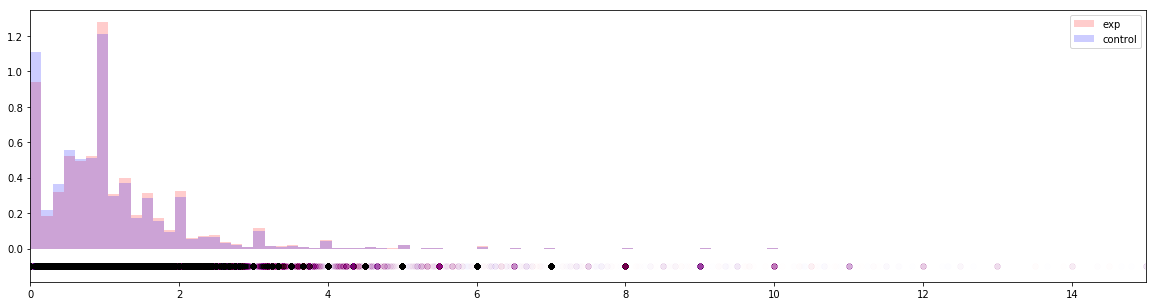

In [29]:
plt.figure(figsize=(20, 5))
plt.hist(exp_clicks, bins=100, range=(0, 15), normed=True, alpha=0.2, label="exp", color='red')
plt.scatter(exp_clicks, [-0.1 for _ in range(len(exp_clicks))], alpha=0.003, color='red')
plt.hist(control_clicks, bins=100, range=(0, 15), normed=True, alpha=0.2, label="control", color='blue')
plt.scatter(control_clicks, [-0.1 for _ in range(len(control_clicks))], alpha=0.003, color='blue')
plt.xlim(0, 15)
plt.legend()
plt.show()

На глаз кажется, что влияние есть.

Видно, что количество кликов увеличилось в эксперименте (какое-то количество с меньшего числа кликов перетекло на большее).

Я бы не сказала, что два этих распределения очень похожи на два смещенных друг относительно друга, на самом деле.

# Применим Mann–Whitney U test

In [40]:
statistic, pvalue = mannwhitneyu(exp_clicks, control_clicks)
print(statistic, pvalue)

37725155448.0 3.16295838585e-308


p-value говорит нам, что неверно, что 2 распределения одинаковы (оно вроде как и видно)

# Исследование для cреза браузеров

In [33]:
browsers = set()

In [34]:
exp_clicks_by_browser = {}
control_clicks_by_browser = {}
for index, row in tqdm(data.iterrows()):
    group = row['group']
    user_id = row['user_id']
    clicks = row['clicks']
    browser = row['browser']
    if group == 'slot=exp':
        if  not browser in exp_clicks_by_browser.keys():
            exp_clicks_by_browser[browser] = {}
            browsers.add(browser)
        if not user_id in exp_clicks_by_browser[browser].keys():
            exp_clicks_by_browser[browser][user_id] = (clicks, 1)
        else:
            clicks_sum, count = exp_clicks_by_browser[browser][user_id]
            exp_clicks_by_browser[browser][user_id] = (clicks_sum + clicks, count + 1)
    else:
        if  not browser in control_clicks_by_browser.keys():
            control_clicks_by_browser[browser] = {}
            browsers.add(browser)
        if not user_id in control_clicks_by_browser[browser].keys():
            control_clicks_by_browser[browser][user_id] = (clicks, 1)
        else:
            clicks_sum, count = control_clicks_by_browser[browser][user_id]
            control_clicks_by_browser[browser][user_id] = (clicks_sum + clicks, count + 1)


0it [00:00, ?it/s]
1it [00:00,  6.16it/s]
630it [00:00, 2419.19it/s]
Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.4/threading.py", line 920, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.4/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.4/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
1311it [00:00, 3654.34it/s]
6069253it [14:38, 6909.07it/s]


In [35]:
print(control_clicks_by_browser.keys())
print(exp_clicks_by_browser.keys())
print(browsers)

dict_keys(['browser=Browser #2', 'browser=Browser #4', 'browser=Browser #20', 'browser=Browser #22', 'browser=Browser #17', 'browser=Browser #14'])
dict_keys(['browser=Browser #2', 'browser=Browser #4', 'browser=Browser #20', 'browser=Browser #22', 'browser=Browser #17', 'browser=Browser #14'])
{'browser=Browser #2', 'browser=Browser #4', 'browser=Browser #20', 'browser=Browser #22', 'browser=Browser #14', 'browser=Browser #17'}


In [36]:
exp_mean_clicks_by_browser = {}
control_mean_clicks_by_browser = {}

In [37]:
for browser in browsers:
    exp_mean_clicks_by_browser[browser] = {}
    for key, value in exp_clicks_by_browser[browser].items():
        clicks_sum, count = exp_clicks_by_browser[browser][key]
        exp_mean_clicks_by_browser[browser][key] = clicks_sum / count
    control_mean_clicks_by_browser[browser] = {}
    for key, value in control_clicks_by_browser[browser].items():
        clicks_sum, count = control_clicks_by_browser[browser][key]
        control_mean_clicks_by_browser[browser][key] = clicks_sum / count

# Рисуем графики и считаем p-value

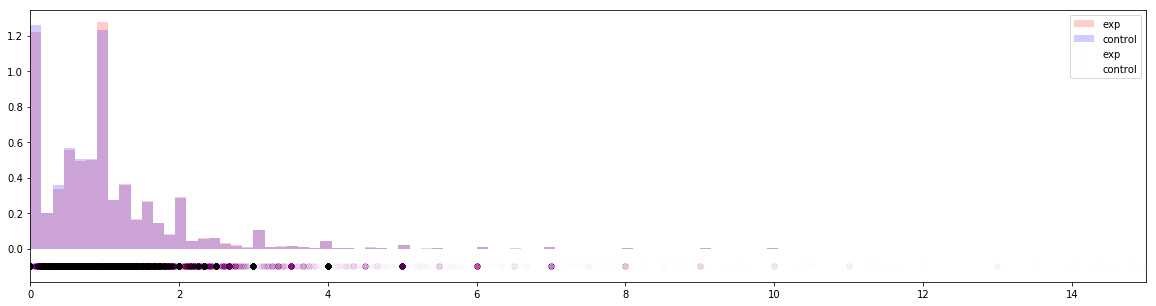

browser=Browser #2 pvalue: 4.70637430558e-05


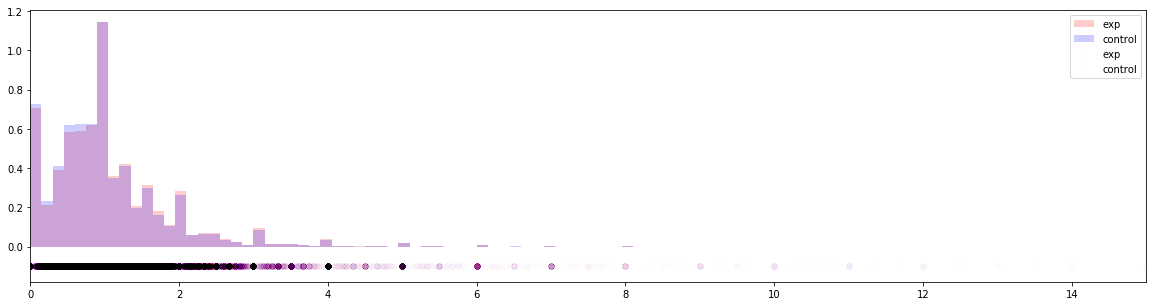

browser=Browser #4 pvalue: 6.63715584287e-22


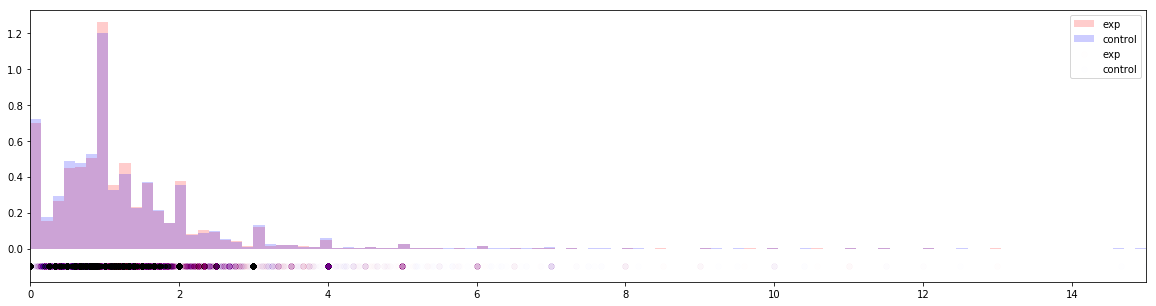

browser=Browser #20 pvalue: 0.00174317037974


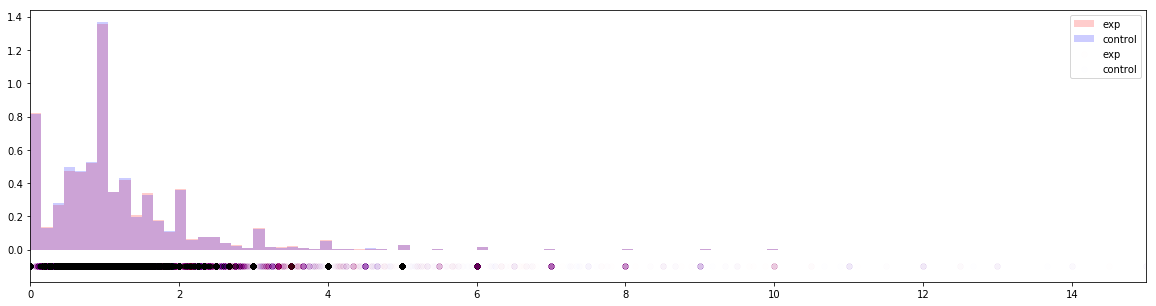

browser=Browser #22 pvalue: 0.000741201909618


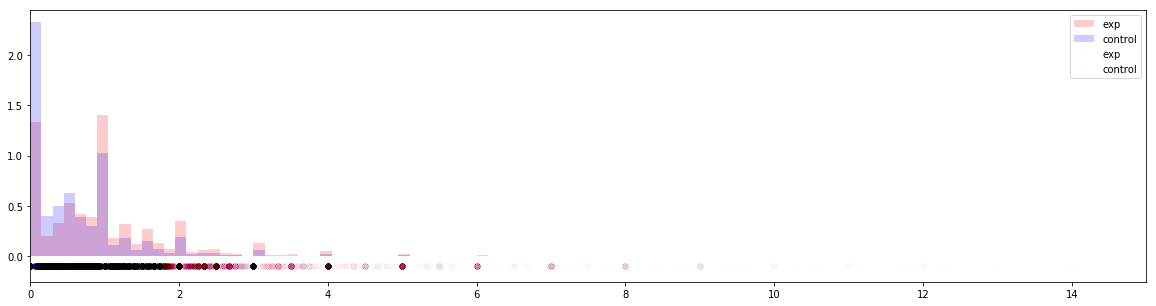

browser=Browser #14 pvalue: 0.0


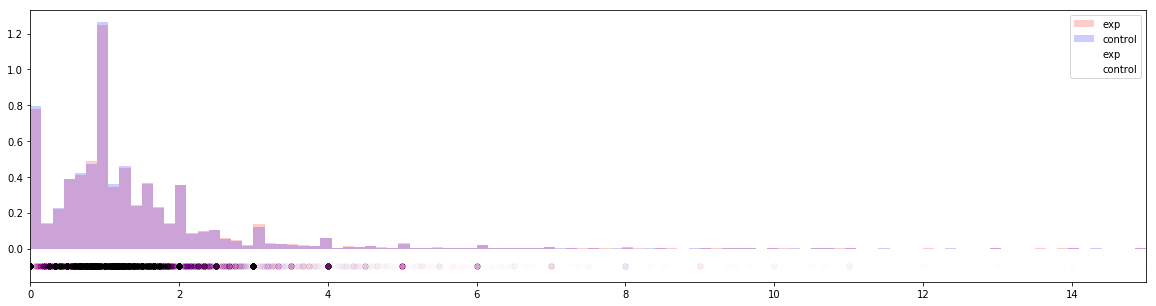

browser=Browser #17 pvalue: 0.070968321676


In [39]:
for browser in browsers:
    exp_clicks_browser = list(exp_mean_clicks_by_browser[browser].values())
    control_clicks_browser = list(control_mean_clicks_by_browser[browser].values())
    plt.figure(figsize=(20, 5))
    plt.hist(exp_clicks_browser, bins=100, range=(0, 15), normed=True, alpha=0.2, label="exp", color='red')
    plt.scatter(exp_clicks_browser, [-0.1 for _ in range(len(exp_clicks_browser))], label="exp", alpha=0.003, color='red')
    plt.hist(control_clicks_browser, bins=100, range=(0, 15), normed=True, alpha=0.2, label="control", color='blue')
    plt.scatter(control_clicks_browser, [-0.1 for _ in range(len(control_clicks_browser))], alpha=0.003, label="control", color='blue')
    plt.xlim(0, 15)
    plt.legend()
    plt.show()
    statistic, pvalue = mannwhitneyu(exp_clicks_browser, control_clicks_browser)
    print(browser, "pvalue:", pvalue)

Видимо, изменения не сильно задели браузер 17. А так же в браузерах 20, 22 мы можем считать, что ничего особо не изменилось с каким-то уровнем значимости.

В браузере же 14 очень сильно локализовались все изменения.

Так же по гистограммам можно скорее сказать, что количество кликов меньше в контрольной группе. (даже где их количество несильно изменилось).

Например, в браузере 14 очень много безкликовых(или почти) ситуаций в контрольной группе.

То есть в экcперименте в среднем количество кликов увеличилось.
Что же касается браузера 14, то в нем убралось много ситуаций, когда кликов вообще не было.

### Посмотрим на браузеры без 14-ого.

In [46]:
exp_clicks_without_14_browser = []
control_clicks_without_14_browser = []

In [47]:
for browser in browsers:
    if browser != "browser=Browser #14":
        exp_clicks_without_14_browser = exp_clicks_without_14_browser + \
        list(exp_mean_clicks_by_browser[browser].values())
        control_clicks_without_14_browser = control_clicks_without_14_browser + \
        list(control_mean_clicks_by_browser[browser].values())

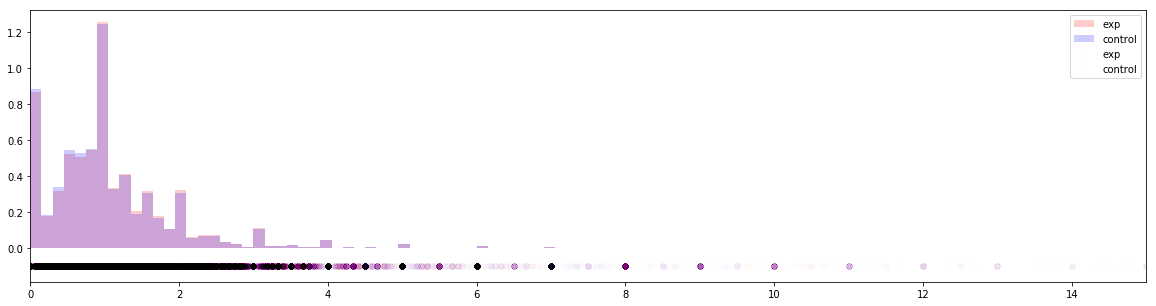

browser=Browser #17 pvalue: 1.05433400011e-24


In [51]:
plt.figure(figsize=(20, 5))
plt.hist(exp_clicks_without_14_browser, bins=100, range=(0, 15), normed=True, alpha=0.2, label="exp", color='red')
plt.scatter(exp_clicks_without_14_browser, [-0.1 for _ in range(len(exp_clicks_without_14_browser))], label="exp", alpha=0.003, color='red')
plt.hist(control_clicks_without_14_browser, bins=100, range=(0, 15), normed=True, alpha=0.2, label="control", color='blue')
plt.scatter(control_clicks_without_14_browser, [-0.1 for _ in range(len(control_clicks_without_14_browser))], alpha=0.003, label="control", color='blue')
plt.xlim(0, 15)
plt.legend()
plt.show()
statistic, pvalue = mannwhitneyu(exp_clicks_without_14_browser, control_clicks_without_14_browser)
print(browser, "pvalue:", pvalue)

Хотя изменения сильно локализуются в браузере 14, то, что в каждом браузере был маленький прирост кликов - дает также суммарный прирост кликов и изменение распределения метрики, красящий ее.

# По времени

In [44]:
exp_clicks_by_time = {}
control_clicks_by_time = {}
for index, row in tqdm_notebook(data.iterrows()):
    group = row['group']
    user_id = row['user_id']
    clicks = row['clicks']
    browser = row['browser']
    date = row['date']
    if group == 'slot=exp':
        if not date in exp_clicks_by_time.keys():
            exp_clicks_by_time[date] = (clicks, 1)
        else:
            clicks_sum, count = exp_clicks_by_time[date]
            exp_clicks_by_time[date] = (clicks_sum + clicks, count + 1)
    else:
        if not date in control_clicks_by_time.keys():
            control_clicks_by_time[date] = (clicks, 1)
        else:
            clicks_sum, count = control_clicks_by_time[date]
            control_clicks_by_time[date] = (clicks_sum + clicks, count + 1)

In [45]:
exp_mean_clicks_by_time = {}
for key, value in exp_clicks_by_time.items():
    sum_clicks, count = value
    exp_mean_clicks_by_time[key] = sum_clicks / count
control_mean_clicks_by_time = {}
for key, value in control_clicks_by_time.items():
    sum_clicks, count = value
    control_mean_clicks_by_time[key] = sum_clicks / count

In [53]:
exp_clicks_time = list(exp_mean_clicks_by_time.items())
print(exp_clicks_time)

[('2016-02-26', 1.1285242726392317), ('2016-03-02', 1.328707992816144), ('2016-03-03', 1.1935646162320173), ('2016-02-27', 1.1394658276316183), ('2016-02-28', 1.1685347794439422), ('2016-02-29', 0.9453375476720616), ('2016-03-01', 0.707128046687264)]


In [54]:
control_clicks_time = list(control_mean_clicks_by_time.items())
print(control_clicks_time)

[('2016-02-26', 1.0738690350506757), ('2016-03-02', 1.2621507510555274), ('2016-03-03', 1.1269521855025217), ('2016-02-27', 1.0864517505740408), ('2016-02-28', 1.1204940932396283), ('2016-02-29', 0.895871460985811), ('2016-03-01', 0.6730711395089933)]


In [55]:
exp_clicks_time.sort(key=lambda x: x[0])
print(exp_clicks_time)
control_clicks_time.sort(key=lambda x: x[0])
print(control_clicks_time)

[('2016-02-26', 1.1285242726392317), ('2016-02-27', 1.1394658276316183), ('2016-02-28', 1.1685347794439422), ('2016-02-29', 0.9453375476720616), ('2016-03-01', 0.707128046687264), ('2016-03-02', 1.328707992816144), ('2016-03-03', 1.1935646162320173)]
[('2016-02-26', 1.0738690350506757), ('2016-02-27', 1.0864517505740408), ('2016-02-28', 1.1204940932396283), ('2016-02-29', 0.895871460985811), ('2016-03-01', 0.6730711395089933), ('2016-03-02', 1.2621507510555274), ('2016-03-03', 1.1269521855025217)]


In [67]:
exp_timeline, exp_values = zip(*exp_clicks_time)
control_timeline, control_values = zip(*control_clicks_time)

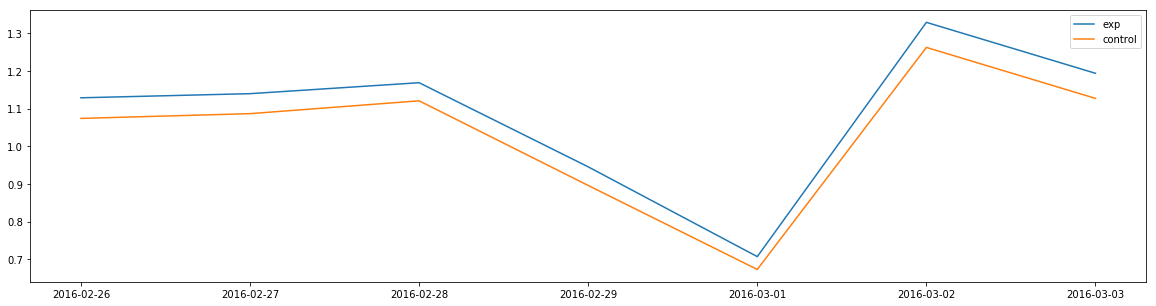

In [68]:
plt.figure(figsize=(20, 5))
plt.plot(pd.to_datetime(exp_timeline), exp_values, label="exp")
plt.plot(pd.to_datetime(control_timeline), control_values, label="control")
plt.legend()
plt.show()

Если посмотреть по времени среднее количество кликов, то видно, что они действительно равномерно подросли в эксперименте по каждому дню в отдельности.

# Попытка в выводы

Вообще, очень сложно сказать - улучшилось что-то или нет, не зная, какой именно был эксперимент и какие эффекты дают разные браузеры.

Что мы имеет? Количество кликов в эксперименте в среднем больше, чем в контрольной группе, при этом изменения разной степени выраженности в зависимости от браузера.

Что может быть?

Браузеры могут отличаться, возможно, тем, способны ли они отрисовывать что-то.
И то, что, например, информация, показываемая рядом с результатами поиска, в каком-то браузере перестала отрисовываться может привести к увеличению количества кликов.
Сценарий 1 - что-то сломалось в отрисовывании.

Если же это наоборот какая-то кликабельная фича связанная с отрисовыванием, например...
в гугле у погоды добавили скрол (где можно посмотреть погоду в различные часы текущего дня), то количество кликов должно увеличиться, если пользователи пользуюся фичой - сценарий 2.
Или в карусельке фильмов количетво кликов возрастает - хороший пизнак.

Сценарий 3 - просто почемуто пользователи одного браузера среагировали на изменение больше, чем  пользователи другого браузера, так как аудитории браузеров отличаются.
Или меньше (так как то, что кликов было меньше, могло быть и чем-то лучшим).

Я просто старалась показать, что сказать положительно ли изменение или отрицательно ли - сложно.
Ну а вообще наверное предполагается - больше кликов - лучше, тогда изменение было бы положительным.

### Финальные выводы

Тем не менее, сценарии 1, 2 отвергаются, так как одинаковая тенденция наблюдается во всех браузерах.

Тогда остается считать, что различие действительно в аудитории браузеров.

И что в целом стало меньше малокликовых ситуаций и они перешли в больше кликовые ситуации. Заметно, что пользователи, которые в среднем делали ближе к 0 кликов, стали теперь кликать больше.

Из вышеупомянутого можно предположить, что для какой-то конкретной аудитории пользователей было увеличено число кликов. 
Так что можно предположить, что изменились ответы по каким-то специфичным запросам.
И так как клики "появились", так как раньше их в среднем было 0 у этой группы, то
, наверное, поиск улучшился.